In [23]:
from calcCBH import calcCBH
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml
from rdkit.Chem import CanonSmiles
from data import molData
from UQ import uncertainty_quantification

In [2]:
uq = uncertainty_quantification(1000, dataframe_path='../../CBH Schemes/Franklin_v5.pkl', saturate=[1,9], 
                           priority='abs_coeff', alt_rxn_option="include")

In [3]:
uq.run()

Process completed with errors in 13 species
These errors are likely to have propagated for the calculation of heats of formation of larger species.
Updating the reference values of species in the database will improve accuracy of heats of formation.
To inspect the errors, run the calcCBH.print_errors() method.


Number of Species:: 100%|███████████████████████| 53/53 [00:01<00:00, 33.91it/s]


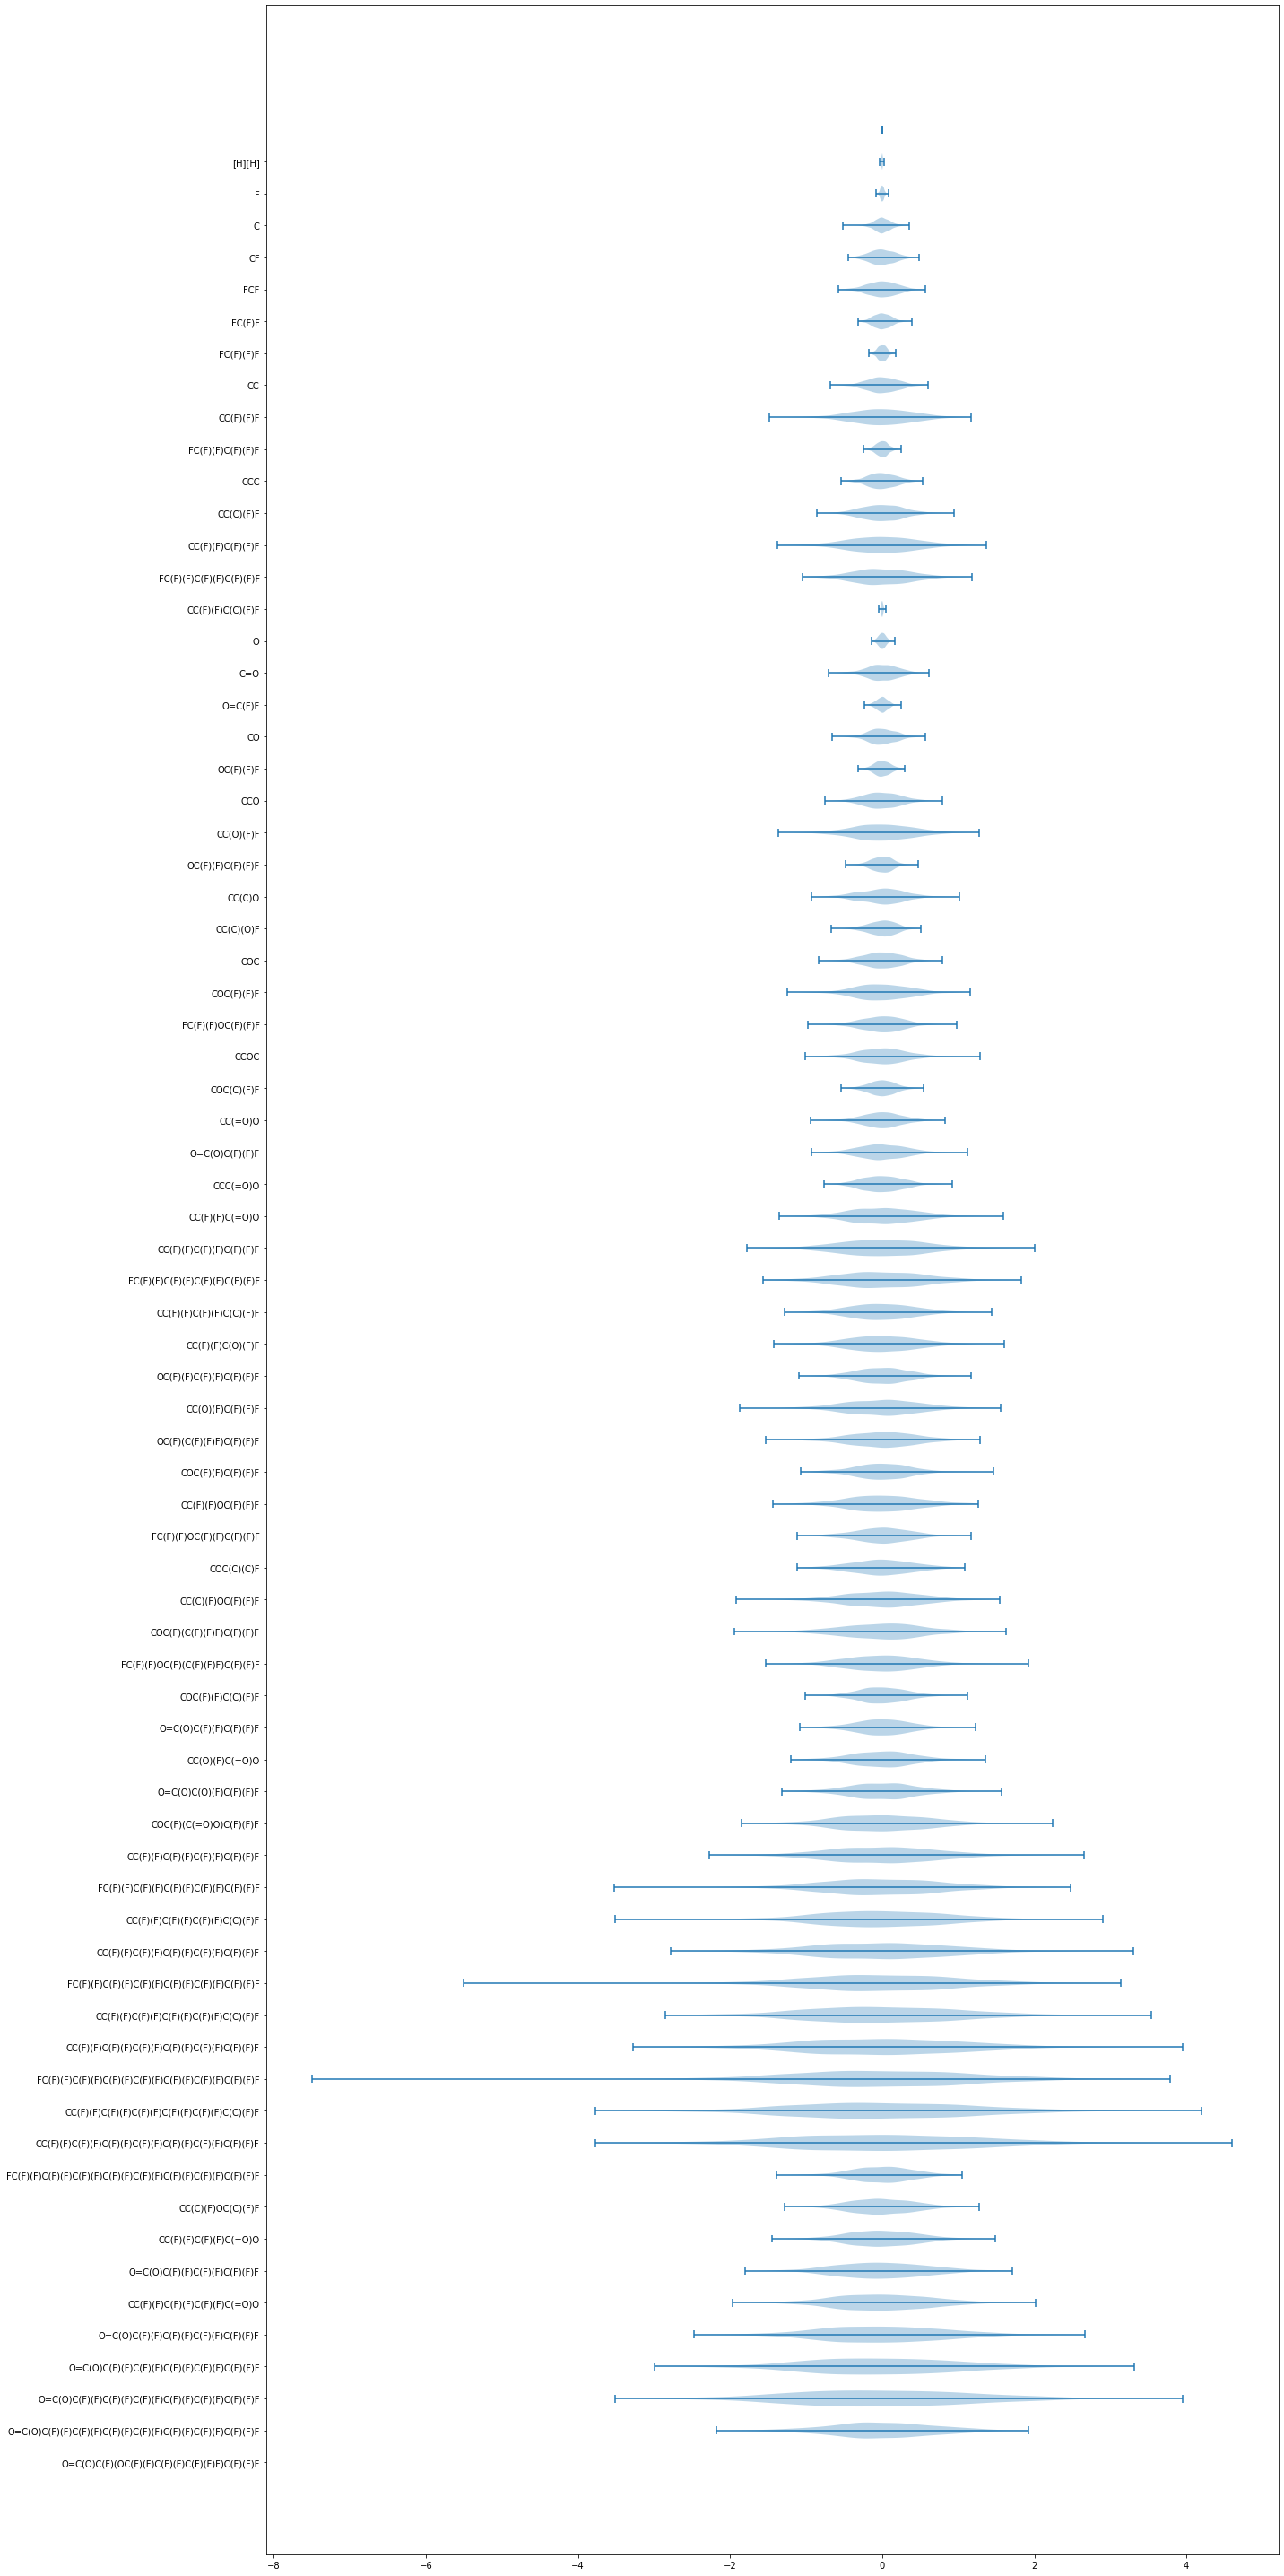

In [21]:
normalized_simresults = uq.simulation_results - np.expand_dims(uq.simulation_results.mean(axis=1), axis=-1)
plt.figure(figsize=(20,40))
plt.violinplot(normalized_simresults.T[:,::-1], vert=False)
plt.yticks(ticks=np.arange(len(normalized_simresults)), labels=uq.species[::-1])
plt.tight_layout()
plt.show()

In [3]:
uq.run_cbh_selection()

alt rxn option: include | priority: rung: : 12it [01:36,  8.06s/it]     


[('ignore', 'abs_coeff'),
 ('ignore', 'rel_coeff'),
 ('ignore', 'rung'),
 ('best_alt', 'abs_coeff'),
 ('best_alt', 'rel_coeff'),
 ('best_alt', 'rung'),
 ('avg_alt', 'abs_coeff'),
 ('avg_alt', 'rel_coeff'),
 ('avg_alt', 'rung'),
 ('include', 'abs_coeff'),
 ('include', 'rel_coeff'),
 ('include', 'rung')]

In [4]:
np.shape(uq.simulation_results[:,:,0])

(12, 73)

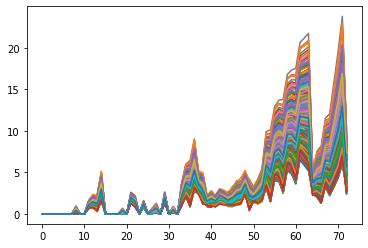

In [5]:
plt.plot(uq.simulation_results[:,:,:].std(axis=0))
plt.show()

In [3]:
uq.run()

Process completed with errors in 14 species
These errors are likely to have propagated for the calculation of heats of formation of larger species.
Updating the reference values of species in the database will improve accuracy of heats of formation.
To inspect the errors, run the calcCBH.print_errors() method.


100%|███████████████████████████████████████████| 53/53 [00:02<00:00, 19.75it/s]


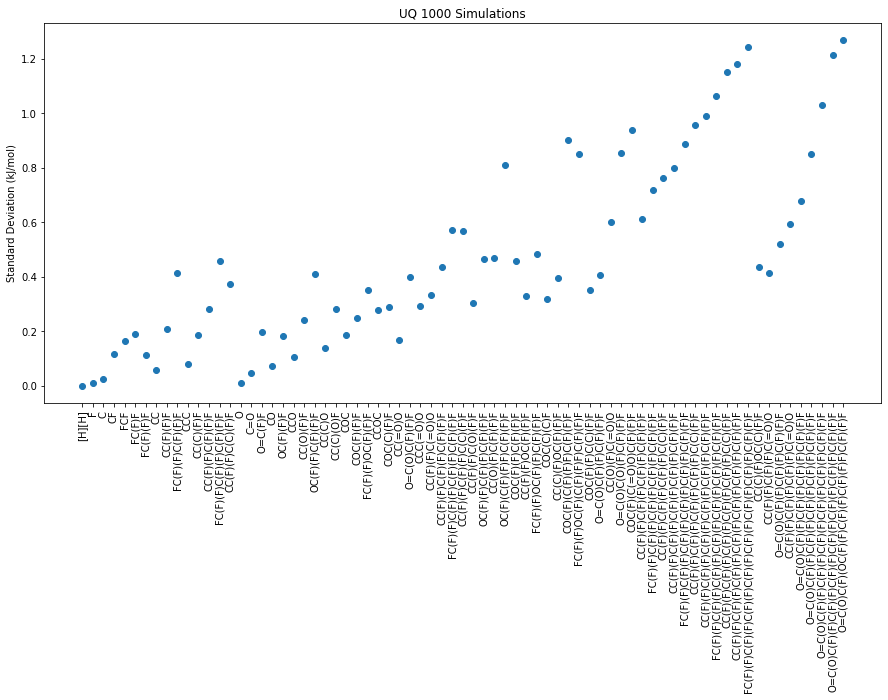

In [4]:
df = pd.DataFrame(uq2.simulation_results, index=uq2.species)
means = np.mean(uq2.simulation_results, axis=1)
stds = np.std(uq2.simulation_results, axis=1)
plt.figure(figsize=(15,7))
plt.scatter(uq2.species, stds)
plt.ylabel('Standard Deviation (kJ/mol)')
plt.xticks(rotation=90)
plt.title('UQ 1000 Simulations')
plt.show()